## 3.1 - Did the increase in Airbnb popularity also lead to an increase in prices and the number of reviews for listings in San Francisco?

As teased in the title, this part takes a look at how the ever increasing popularity of Airbnb affected the number of average reviews and the average price for listings in San Francisco.

There are two scenarios that might have enfolded over time:

#### Scenario 1:

- Both the number of average ratings and the average prices could have risen over the years, as the popularity of Airbnb and a rise of demand enabled providers to raise their prices continually. With a rise of demand, the average number of reviews should have increased as well, since the regularity and frequency of the bookings for rooms and appartments must have gone up.

#### Scenario 2:

- There might be no clear development and trend for both the avg. number of reviews and prices over time, since the Airbnb market is volatile and mostly used by inexperienced individuals whose goal is to earn some money on the side, and not to obtain the biggest profit possible. Such individuals usualy offer their rooms and apartments infrequently and sporadically, meaning that they also don't obtain a rise in the number of reviews quickly.

In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from PIL import Image
! pip install wordcloud
from wordcloud import WordCloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158002 sha256=ba4d19a1645e10c904e69af6103095e81e3a1bdf35979780b9c01c03bc49b7e2
  Stored in directory: /Users/ivanolujic/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


In [3]:
df_2015 = pd.read_csv("/Users/ivanolujic/Desktop/OneDrive_1_29.11.2020/2015 - 05/listings.csv")
df_2016 = pd.read_csv("/Users/ivanolujic/Desktop/OneDrive_1_29.11.2020/2016 - 05/listings.csv")
df_2017 = pd.read_csv("/Users/ivanolujic/Desktop/OneDrive_1_29.11.2020/2017 - 05/listings.csv")
df_2018 = pd.read_csv("/Users/ivanolujic/Desktop/OneDrive_1_29.11.2020/2018 - 05/listings.csv")
df_2019 = pd.read_csv("/Users/ivanolujic/Desktop/OneDrive_1_29.11.2020/2019 - 05/listings2019-5.csv")

df_2015["year"] = 2015
df_2016["year"] = 2016
df_2017["year"] = 2017
df_2018["year"] = 2018
df_2019["year"] = 2019

dfStacked = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019])

#Used so far

dfNoReviews = dfStacked.groupby("year")["number_of_reviews"].mean().reset_index(name="Number of Reviews")
dfPrices = dfStacked.groupby("year")["price"].mean().reset_index(name="Average Price")
dfRoomTypePrice = dfStacked.groupby(['room_type', 'year'])["price"].mean().reset_index(name="Average Price")

## The development of both avg. reviews and prices from 2015 until 2019

Text(0.5, 1.0, 'Avg. Prices are not unambiguous, either')

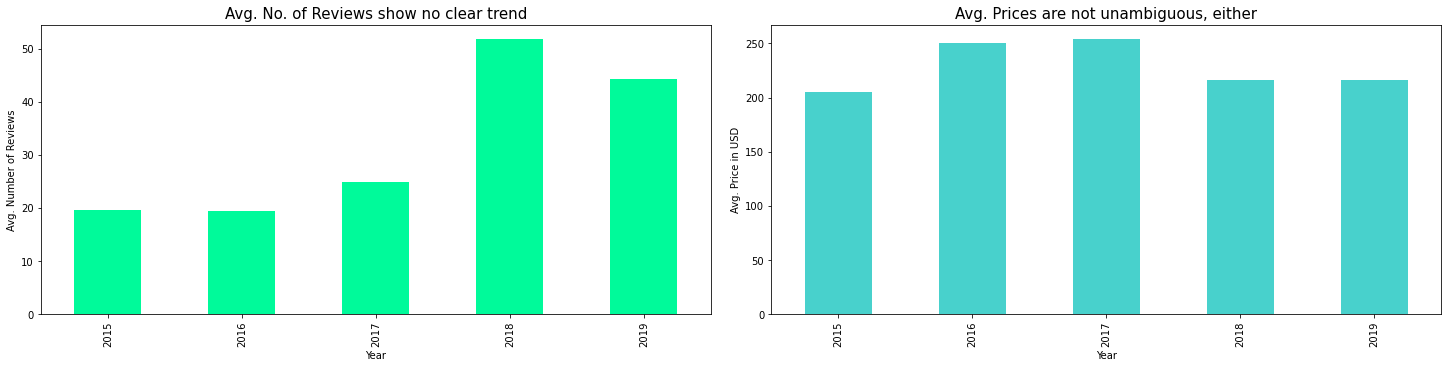

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), constrained_layout=True)

dfNoReviews.plot(x = 'year', y = 'Number of Reviews', ax=ax[0], legend=None, kind= "bar", color='mediumspringgreen')
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Avg. Number of Reviews")
ax[0].set_title("Avg. No. of Reviews show no clear trend",fontsize=15)

dfPrices.plot(x = 'year', y = 'Average Price', ax=ax[1], legend=None, kind= "bar", color='mediumturquoise')
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Avg. Price in USD")
ax[1].set_title("Avg. Prices are not unambiguous, either",fontsize=15)

The average number of Reviews in San Francisco doesn't show any proper Trend from 2015 throughout 2019 - While there is a tremendous rise in average Reviews from 2016 to 2018, that same development gets evaporated again the year after, in 2019.

We see a similar development for the average Prices of Listings on Airbnb. While a growth in avg. Prices occurred from 2015 until 2017, prices started to decline in 2018 again, with 2019 once more showing a decline compared to the previous year.


#### As it turns out, Scenario 2 seems to be the likelier one:

As mentioned above, the reason for such unclear trends in both number of average Reviews and average Prices might lie in the fact that the market for listings in Airbnb is fairly volatile, with people offering their rooms and apartments only periodically and irregularly, thus creating no possibility for the Airbnb market to solidify any growth or proper trend in both reviews and prices.

# Change of Word Frequency over the years

Word Clouds have become a prominent way of visually representing text data. They usually focus on single words, and the importance of each listed word is shown with font size or color. This form of Visualization is useful for quickly perceiving the most prominent terms to determine its relative prominence.

In this section, we will use Word Clouds to assess the most prominent and frequent words of Airbnb Listings in San Francisco.

It is also interesting to see whether the most commonly used words in a listings' title have changed over the years.

In order to get a brief look whether there was any tremendous change or not, this sub-section will provide two wordclouds :

- One wordcloud from the initial year 2015
- One recent wordcloud from the year 2019

By doing this, one can get a brief overview of the most prominent words used in Airbnb Listings, as well as the changes of the word's frequencies throughout the years in a fancy manner.

In [48]:
def pc(wordcloud):
    plt.figure(figsize=(50, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");
    
wordcloud = WordCloud(width = 1000, height = 1000, random_state=1, background_color='lavenderblush', colormap='copper', collocations=False).generate(' '.join(df_2015['name']))

wordcloud2 = WordCloud(width = 1000, height = 1000, random_state=1, background_color='aliceblue', colormap='ocean', collocations=False).generate(' '.join(df_2019['name']))

# Most frequent Words in the listings of 2015

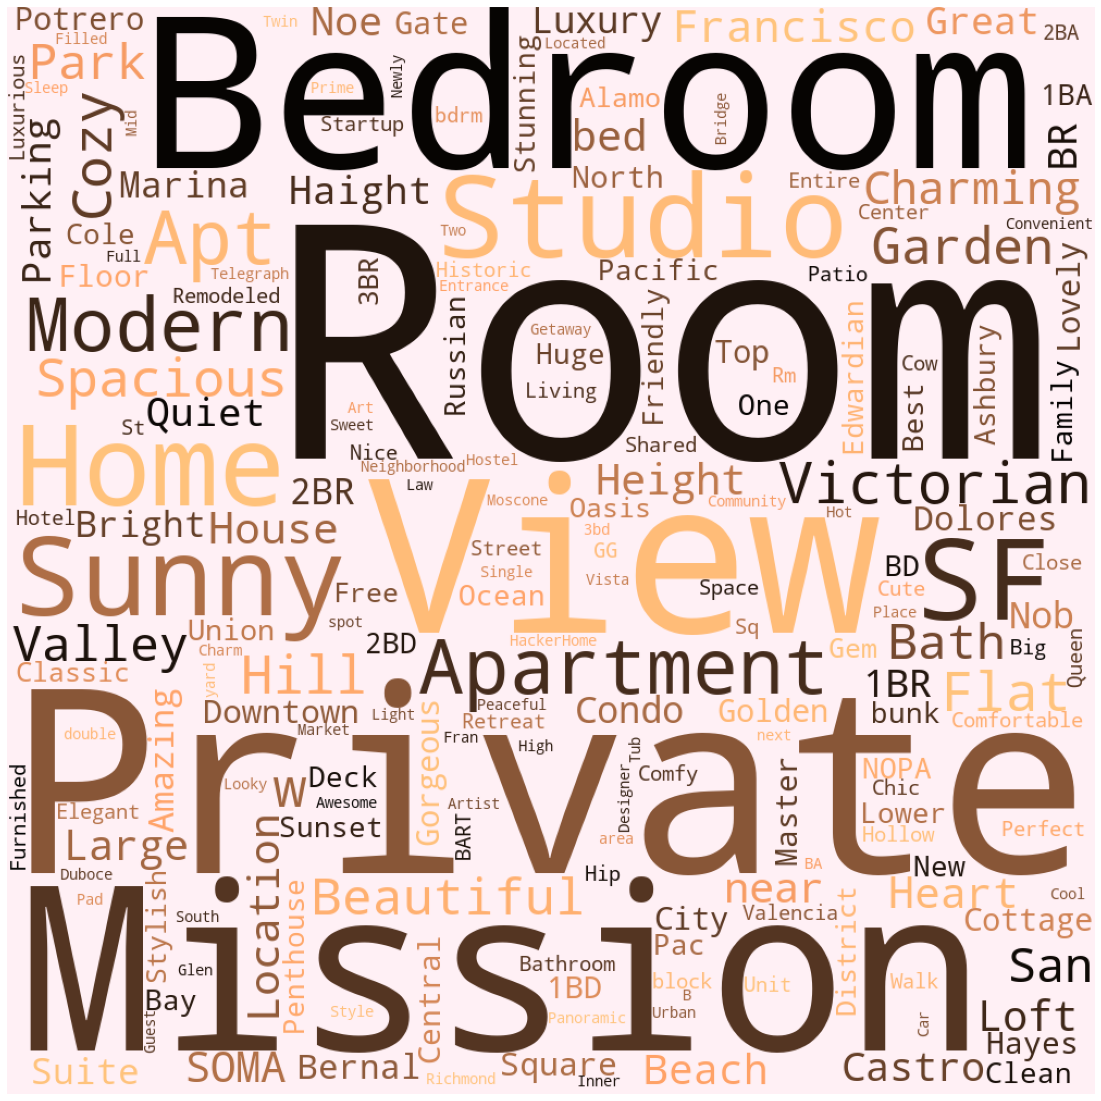

In [68]:
pc(wordcloud)

# Most frequent words in the listings of 2019

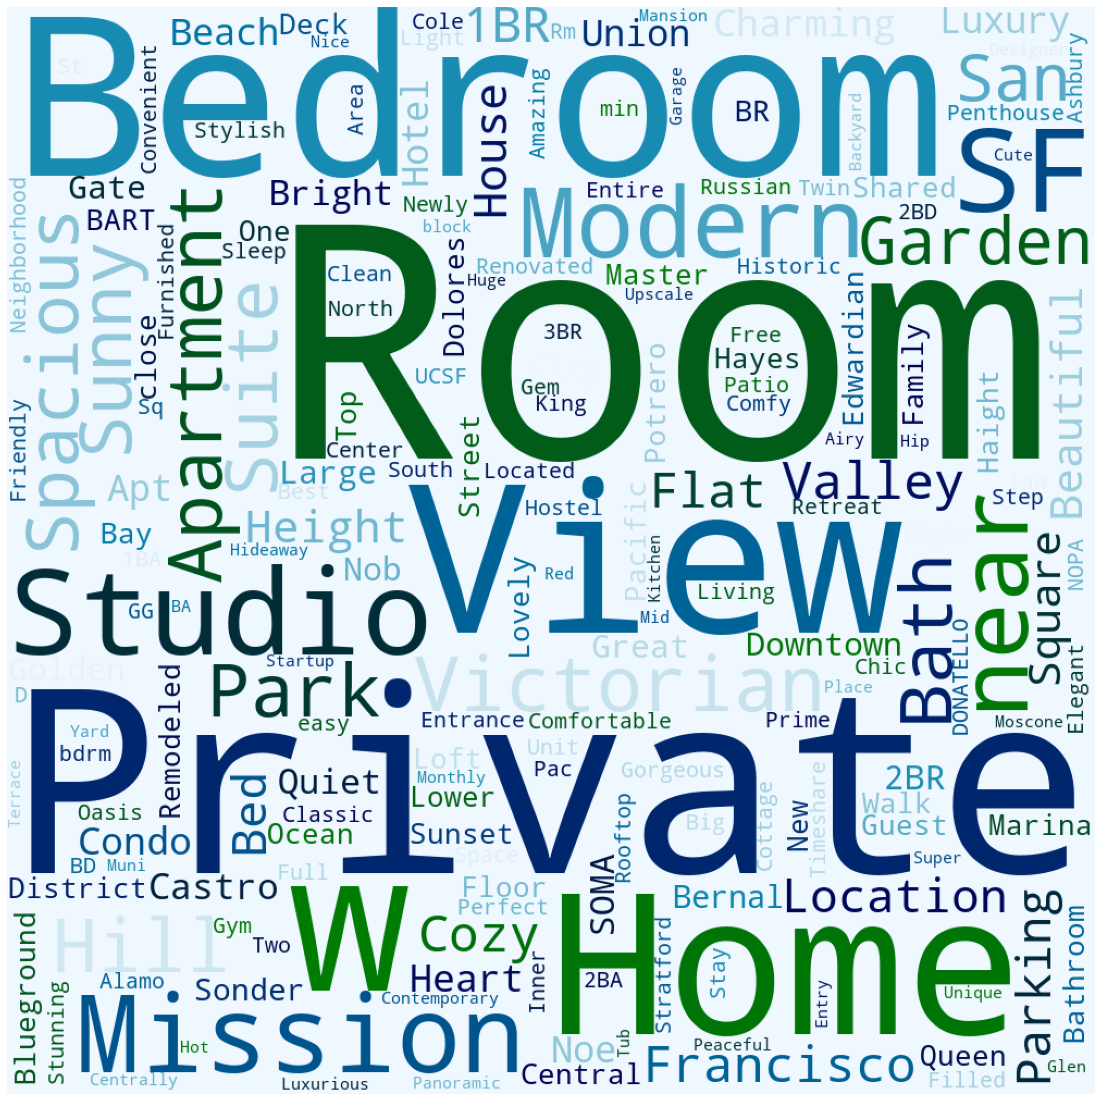

In [49]:
pc(wordcloud2)

# There doesn't seem to be any tremendous change for the most frequent words from 2015 until 2019

As one might have guessed, there doesn't seem to be any tremendous change - Fairly basic words such as "Private, "Room", "Home", "Bedroom", "Studio", or "View" are dominating both lists, since such words tend to be the most important ones when creating a listing for Airbnb.

The biggest occurring change is most likely happening on the adjectives used to describe a Home or Room: The popularity and frequency of usage of words such as "cozy", "charming" or "stunning" changes over the years, so that's where you can most likely find the biggest deviations in usage for the descriptions and titles of Airbnb-Listings.